## Classification project

## Data Gathering

In [93]:
from warnings import filterwarnings
filterwarnings('ignore')

In [94]:
path = r"C:\Users\Akshay\OneDrive\Desktop\datasets\datasets-train.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [96]:
df.shape

(136429, 14)

In [97]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [98]:
# check for missing data
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [99]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [100]:
# Convert Product ID to string
df["Product ID"] = df["Product ID"].astype(str)


In [101]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [102]:
df["Machine failure"].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

## There are no missing values nor duplicated rows

## Seperate X and Y features

In [103]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [104]:
 #Identify target and feature columns
target = 'Machine failure'

In [105]:
# Separate features (X) and target (y)
X = df.drop(columns=['Machine failure','id','Product ID'])  # All input features
Y = df['Machine failure']                 # Target column

In [106]:
print("\n Feature Columns:")
print(list(X.columns))


 Feature Columns:
['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [107]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [108]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

## Value counts of machine failure

In [109]:
print(" Value Counts of Machine Failure:")
print(df[target].value_counts())

 Value Counts of Machine Failure:
Machine failure
0    134281
1      2148
Name: count, dtype: int64


In [110]:
print(df[target].value_counts(normalize=True) * 100)

Machine failure
0    98.425555
1     1.574445
Name: proportion, dtype: float64


## Visualize with chart Bar

In [111]:
import matplotlib.pyplot as plt

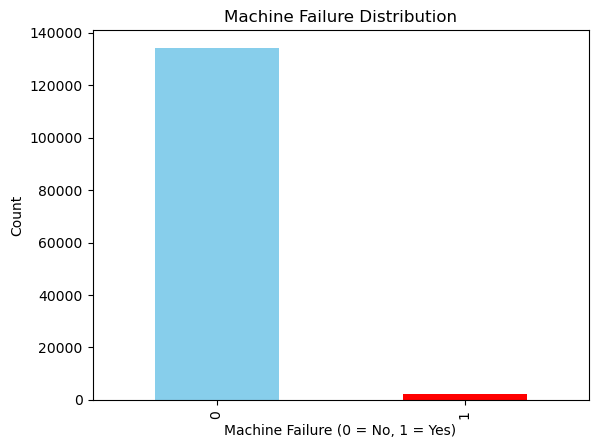

In [112]:
df[target].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Machine Failure Distribution')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [113]:
# Convert numeric columns to proper types
numeric_cols = ['air_temperature_k', 'process_temperature_k', 
                'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

## Separate categorical and continous columns

In [114]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])
print(cat,con,sep='\n')

['Type']
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


## Data Cleaning and Preprocessing

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [116]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'), # data cleaning
    OneHotEncoder(handle_unknown='ignore',sparse_output=False) # feature scaling
)

In [117]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"), # data cleaning
    StandardScaler()
)

In [118]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat), # ('dummy_name',pipeline,list_of_columns)
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [119]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF'])])

In [120]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [121]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

In [122]:
X_pre = pre.fit_transform(X).astype('float32')
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [123]:
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


## Train Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)

In [126]:
xtrain.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
132747,0.0,1.0,0.0,0.395880,0.186930,-0.197001,-0.523234,-1.475951,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
133832,0.0,1.0,0.0,0.986567,0.475704,1.194129,-1.311266,-0.881874,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
47041,0.0,1.0,0.0,0.395880,0.475704,-0.261872,-0.076291,0.681486,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
109653,0.0,0.0,1.0,-1.000288,-1.617905,-1.134031,2.228995,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
126428,0.0,1.0,0.0,1.523554,1.558605,1.749140,-1.628831,-1.444684,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [127]:
xtrain.index

Index([132747, 133832,  47041, 109653, 126428,  57376,  32055,   5469, 100959,
        99257,
       ...
        38316,  25023, 132718, 110794,  64241,  42104,  63856,  81968,  70863,
        80841],
      dtype='int64', length=95500)

In [128]:
xtest.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
22333,0.0,0.0,1.0,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
35216,0.0,1.0,0.0,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
112970,0.0,0.0,1.0,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
14905,1.0,0.0,0.0,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
25676,1.0,0.0,0.0,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [129]:
ytrain.head()

132747    0
133832    0
47041     0
109653    0
126428    0
Name: Machine failure, dtype: int64

In [130]:
ytest.head()

22333     0
35216     0
112970    0
14905     0
25676     0
Name: Machine failure, dtype: int64

## EDA : Exploratory Data Analysis 

## Checking Outliers

### Statistical Analysis

In [131]:
df[con].describe().T
# df.describe()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0
RNF,136429.0,0.002258,0.047461,0.0,0.0,0.0,0.0,1.0


In [132]:
df[cat].describe().T

,count,unique,top,freq
Type,136429,3,L,95354


## Descriptive Analysis
## Visualization : Extracting meaningful insights from different different visuals
### Univariate Analysis
    Analysis of single variable - feature
    Categorical Analysis - Bar plots
    Continuous Analysis - Histogram 

In [133]:
print(df.columns)

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [134]:
print(cat)

['Type']


In [135]:
print(con)

['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


## Pipeline that handles Data cleaning process

In [136]:
# Import Pipeline
from sklearn.pipeline import make_pipeline
# Import Imputer that performs missing data handling by replacing missing data with central tendency
from sklearn.impute import SimpleImputer
# Column Transformer combines pipelines. Here we have 2 pipelines- categorical and continuous 
from sklearn.compose import ColumnTransformer

In [137]:
# pipeline to handle numerical missing content
num_pipe = make_pipeline(SimpleImputer(strategy="median"))

# pipeline to handle categorical missing content
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"))

In [138]:
# combine both the pipelines
final_pipe = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con)
]).set_output(transform="pandas")

In [139]:
final_pipe

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF'])])

In [140]:
df_cleaned = final_pipe.fit_transform(df)
df_cleaned.head(3)

,cat__Type,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
0,L,300.6,309.6,1596.0,36.1,140.0,0.0,0.0,0.0,0.0,0.0
1,M,302.6,312.1,1759.0,29.1,200.0,0.0,0.0,0.0,0.0,0.0
2,L,299.3,308.5,1805.0,26.5,25.0,0.0,0.0,0.0,0.0,0.0


In [141]:
new_cols = []
for i in df_cleaned.columns:
    c = i.split('__')[-1]
    new_cols.append(c)
print(new_cols)

['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [142]:
df_cleaned.columns = new_cols
df_cleaned.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [143]:
df_cleaned.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596.0,36.1,140.0,0.0,0.0,0.0,0.0,0.0
1,M,302.6,312.1,1759.0,29.1,200.0,0.0,0.0,0.0,0.0,0.0
2,L,299.3,308.5,1805.0,26.5,25.0,0.0,0.0,0.0,0.0,0.0
3,L,301.0,310.9,1524.0,44.3,197.0,0.0,0.0,0.0,0.0,0.0
4,M,298.0,309.0,1641.0,35.4,34.0,0.0,0.0,0.0,0.0,0.0


## Checking Outliers

## Handling Outliers

In [146]:
df[con].describe().T
# df.describe()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0
RNF,136429.0,0.002258,0.047461,0.0,0.0,0.0,0.0,1.0


In [147]:
df[cat].describe().T

,count,unique,top,freq
Type,136429,3,L,95354


## Descriptive Analysis
## Visualization : Extracting meaningful insights from different different visuals
### Univariate Analysis
    Analysis of single variable - feature
    Categorical Analysis - Bar plots
    Continuous Analysis - Histogram 

In [148]:
print(cat)

['Type']


## Continous feature
Histograms - Data Distribution

In [168]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [173]:
df[con].skew()

Air temperature [K]         0.161175
Process temperature [K]     0.057088
Rotational speed [rpm]      1.888250
Torque [Nm]                -0.028963
Tool wear [min]            -0.027310
TWF                        25.309063
HDF                        13.813058
PWF                        20.352532
OSF                        15.800499
RNF                        20.975301
dtype: float64

In [175]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [176]:
df['Torque [Nm]'].min()


3.8

In [177]:
df['Torque [Nm]'].max()

76.6

In [178]:
## LOG TRANSFORMATION
import numpy as np
df['Torque [Nm]'] = np.log10(df['Torque [Nm]']+1) # log 0 to the base 10

In [179]:
df['Torque [Nm]'].min()

0.6812412373755872

In [180]:
df['Torque [Nm]'].max()

1.8898617212581883

In [181]:
df['Torque [Nm]']

0         1.569374
1         1.478566
2         1.439333
3         1.656098
4         1.561101
            ...   
136424    1.585461
136425    1.699838
136426    1.596597
136427    1.674861
136428    1.605305
Name: Torque [Nm], Length: 136429, dtype: float64

In [184]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

## EDA:

## Histoplot

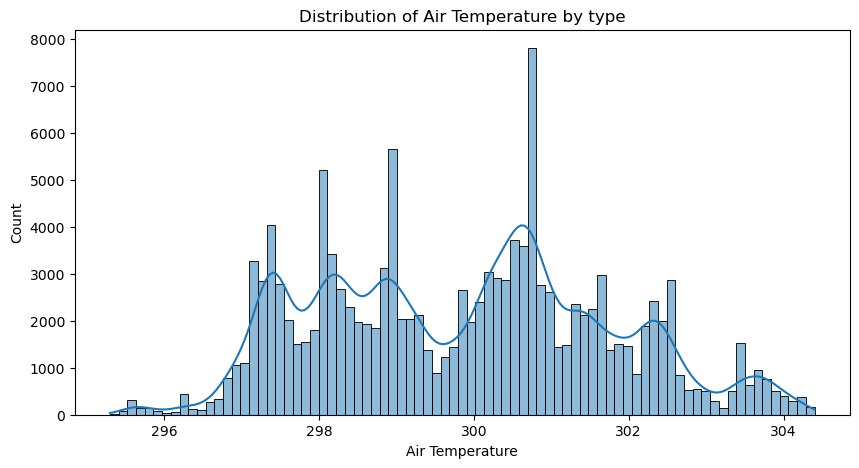

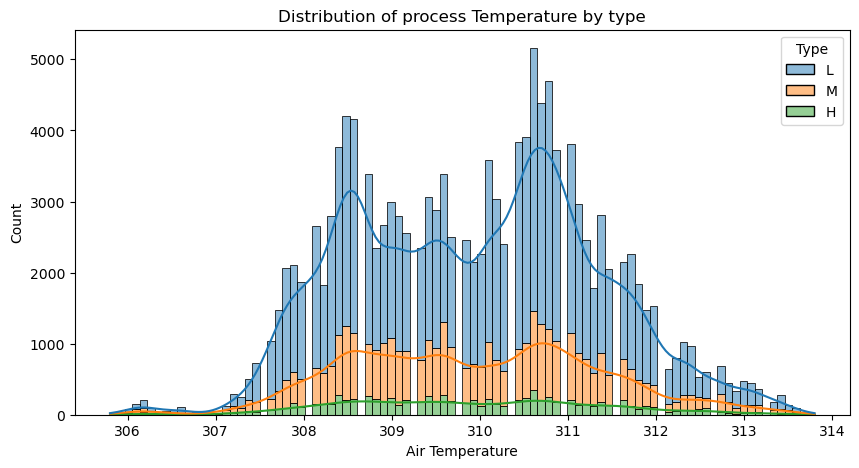

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram for Air Temperature by Type
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Air temperature [K]',multiple='stack',kde=True)
plt.title('Distribution of Air Temperature by type')
plt.xlabel('Air Temperature')
plt.ylabel('Count')
plt.show()

# Plot histogram for process Temperature by Type
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Process temperature [K]',hue='Type',multiple='stack',kde=True)
plt.title('Distribution of process Temperature by type')
plt.xlabel('Air Temperature')
plt.ylabel('Count')
plt.show()

In [197]:
print("\nSummary statistics Before outlier handling:\n")
print(df.describe())


Summary statistics Before outlier handling:

                  id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110       1.606495       104.408901   
std                138.736632       0.095856        63.965040   
min               1181.000000       0.681241         0.000000  

## Correlation

In [194]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [195]:
cat

['Type']

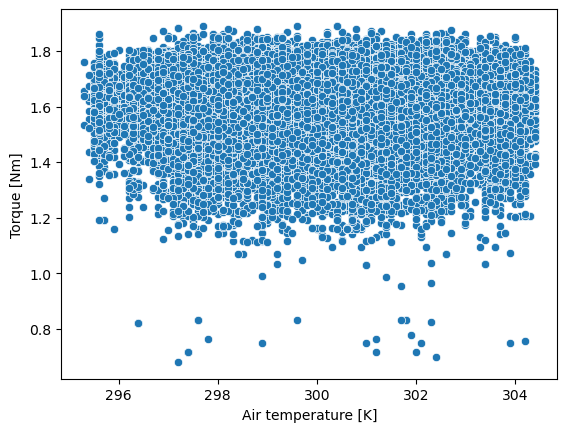

In [191]:
sns.scatterplot(data=df,x='Air temperature [K]',y='Torque [Nm]')
plt.show()

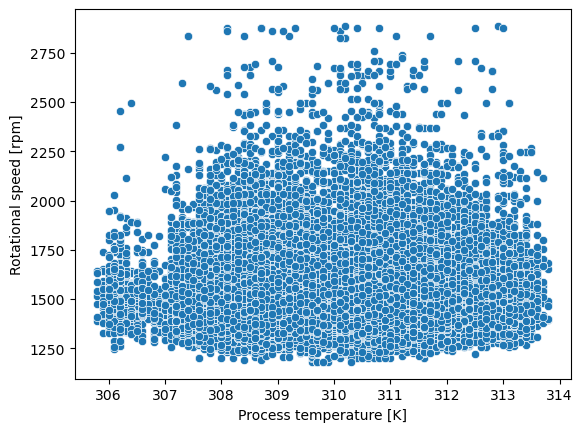

In [193]:
sns.scatterplot(data=df,x='Process temperature [K]',y='Rotational speed [rpm]')
plt.show()

In [192]:
# TO check for the correlation score
df[con].corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.856080,0.016545,-0.011143,0.016994,0.003826,0.100454,0.007967,0.007842,0.004815
Process temperature [K],0.856080,1.000000,0.011263,-0.008730,0.012777,0.004459,0.041454,0.003871,0.005337,0.004399
Rotational speed [rpm],0.016545,0.011263,1.000000,-0.820039,0.003983,-0.005765,-0.081996,0.053948,-0.061376,-0.003410
Torque [Nm],-0.011143,-0.008730,-0.820039,1.000000,-0.003900,0.010087,0.085400,-0.000815,0.088659,0.005975
Tool wear [min],0.016994,0.012777,0.003983,-0.003900,1.000000,0.046470,0.011709,0.007624,0.063604,-0.002071
TWF,0.003826,0.004459,-0.005765,0.010087,0.046470,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,0.100454,0.041454,-0.081996,0.085400,0.011709,0.010145,1.000000,0.046680,0.067149,0.000885
PWF,0.007967,0.003871,0.053948,-0.000815,0.007624,0.039927,0.046680,1.000000,0.090016,0.000827
OSF,0.007842,0.005337,-0.061376,0.088659,0.063604,0.036041,0.067149,0.090016,1.000000,-0.000539
RNF,0.004815,0.004399,-0.003410,0.005975,-0.002071,0.002044,0.000885,0.000827,-0.000539,1.000000


## BarPlot

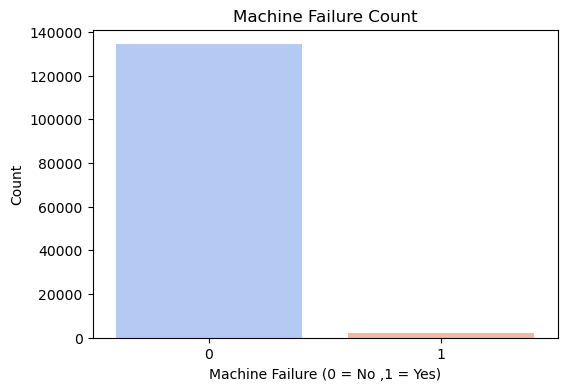

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


failure_counts = df['Machine failure'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=failure_counts.index,y=failure_counts.values, palette="coolwarm")
plt.title("Machine Failure Count")
plt.xlabel("Machine Failure (0 = No ,1 = Yes)")
plt.ylabel("Count")
plt.show()